<a href="https://colab.research.google.com/github/SitiFadhilahRahmi/Portfolio_SitiFadhilah/blob/main/Analisis_Data_Sensor_Siti_Fadhilah_Rahmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Data Sensor**
Pada tugas kali ini,saya menggunakan dataset Sensor Suhu dan Kelembapan . Pada tugas kali ini akan dilakukan beberapa hal yaitu:


*   Pembersihan data
*   Memvisualisasikan perubahan suhu dan kelembapan pada periode tertentu
*   Menghitung rata-rata, nilai minimun, dan nilai maksimum suhu dan kelembapan
*   Mengidentifikasi pola atau tren pada data
*   Melakukan analisis korelasi antara suhu dan kelembapan

# Import Library
Library yang dibutuhkan antara lain:
*   Pandas untuk menangani missing values, mengubah format kolom tanggal, atau filter data pada periode tertentu.
*   Matplotlib untuk membuat grafik dari data kualitas udara.
*   Numpy untuk menghitung rata-rata, nilai maksimum dan minimum
*   Seaborn untuk mengidentifikasi pola
*   sklearn untuk klasifikasi



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Mengumpulkan Data
Mengumpulkan dataset tentang sensor suhu dan kelembapan.

In [ ]:
df = pd.read_csv('/content/Node_501.csv')

Melihat 5 baris pertama yang ada dalam dataset

In [ ]:
print(df.head())

   ID         timestamp  temperature  humidity
0   1  09/12/0014 00:03        25.16     36.47
1   2  09/12/0014 00:13        24.83     35.52
2   3  09/12/0014 00:23        24.83     35.68
3   4  09/12/0014 00:33        24.83     35.84
4   5  09/12/0014 00:44        24.83     35.99


In [ ]:
#informasi umum tentang dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1367 non-null   int64  
 1   timestamp    1367 non-null   object 
 2   temperature  1324 non-null   float64
 3   humidity     1310 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 42.8+ KB
None


terdapat empat kolom pada dataset ini, yaitu kolom pertama untuk id, kolom kedua untuk timestamp atau waktu, kolom ketiga ada temperature atau suhu dan kolom keempat adalah humidity atau kelembaban. Pada dataset ini, waktu yang digunakan adalah per 10 menit.

# 1. Membersihkan Dataset

**Mencari missing values**

Sebelum membersihkan datanya, kita lihat terlebih dahulu apakah ada missing values pada dataset

In [ ]:
df.isnull().sum()

,0
ID,0
timestamp,0
temperature,43
humidity,57


Dapat dilihat bahwa pada dataset ini terdapat 2 kolom yang memiliki missing values, yaitu kolom temperature yang memiliki 43 baris missing values, dan kolom humidity yang memiliki 57 missing values

Data memiliki nilai yang hilang di dua buah kolom. Sebelum membersihkannya, mari kita lihat statistik deskriptif kumpulan data sebelum mengisi nilai yang hilang

In [ ]:
print(df.describe())

               ID  temperature     humidity
count  1367.00000  1324.000000  1310.000000
mean    684.00000    19.342047    46.717162
std     394.76322     5.134557    14.093936
min       1.00000     9.670000   -24.700000
25%     342.50000    15.800000    37.250000
50%     684.00000    19.670000    47.190000
75%    1025.50000    23.220000    56.657000
max    1367.00000    36.770000    76.990000


Untuk mengisi missing values, saya memilih metode dengan mengisinya menggunakan data baris sebelumnya. Alasannya adalah karena perubahan suhu dan kelembaban biasanya tidak akan turun atau naik secara drastis dalam sepuluh menit kecuali dalam kondisi tertentu

In [ ]:
df['temperature'].fillna(method='ffill', inplace=True)
df['humidity'].fillna(method='ffill', inplace=True)

<ipython-input-9-80e2cfbf4fec>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['temperature'].fillna(method='ffill', inplace=True)
<ipython-input-9-80e2cfbf4fec>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['humidity'].fillna(method='ffill', inplace=True)


selanjutnya lihat kembali apakah datset masih memiliki missing values atau tidak

In [ ]:
df.isnull().sum()

,0
ID,0
timestamp,0
temperature,0
humidity,0


**Melihat data outlier**

Setelah dataset bersih dari missing values, selanjutnya kita harus membersihkan data outlier yang kemungkinan akan mengganggu dalam pemrosesan data. Untuk melihatnya saya menggunakan boxplot.

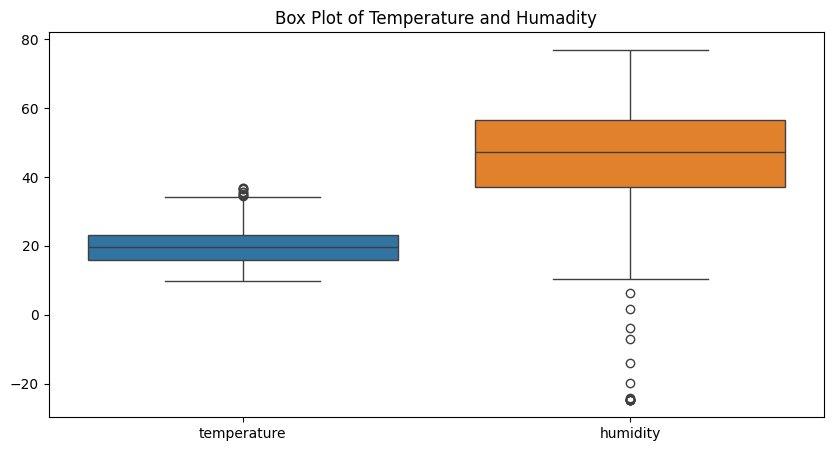

In [ ]:
df_selected = df[['temperature', 'humidity']]
plt.figure(figsize=(10,5))
sns.boxplot(data=df_selected)
plt.title('Box Plot of Temperature and Humadity')
plt.show()

Selanjutnya adalah menghapus data outlier yang ada, pertama menentukan batas atas dan batas bawah data, yang mana ketika data berada di luar batas tersebut lah yang akan dihapus.

Pertama menghapus data outlier pada kolom temperature

In [ ]:
# Menghitung nilai IQR
Q1 = df['temperature'].quantile(0.25)
Q3 = df['temperature'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan nilai lower dan upper bounds untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outliers
df = df[(df['temperature'] >= lower_bound) & (df['temperature'] <= upper_bound)]

Kedua menghapus data outlier dari kolom humidity

In [ ]:
# Menghitung nilai IQR
Q1 = df['humidity'].quantile(0.25)
Q3 = df['humidity'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan nilai lower dan upper bounds untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outliers
df = df[(df['humidity'] >= lower_bound) & (df['humidity'] <= upper_bound)]

# 2. Memvisualisasikan perubahan suhu dan kelembaban

Untuk memvisualisasikan perubahan suhu dan kelembaban dalam kurun waktu tertentu, saya menggunakan line plot yang dapat memvisualisasikan kedua data tersebut dalam bentuk garis.

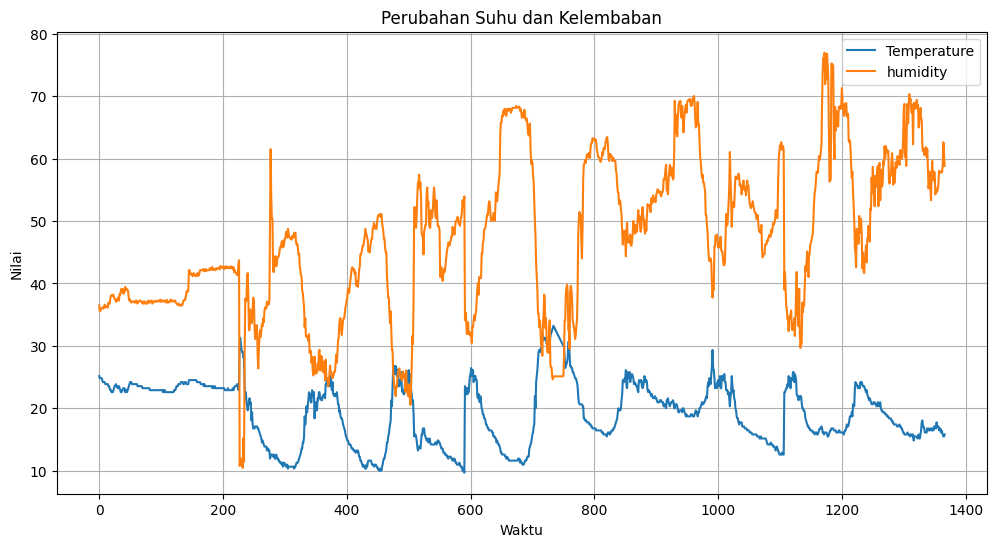

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['temperature'], label='Temperature')
plt.plot(df.index, df['humidity'], label='humidity')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.title('Perubahan Suhu dan Kelembaban')
plt.legend()
plt.grid(True)
plt.show()

# Menhitung Rata-rata, Minimum, dan maksimum suhu dan kelembaban

In [ ]:
mean = np.mean(df['temperature'])
maximum = np.max(df['temperature'])
minimum = np.min(df['temperature'])

print(f"rata-rata suhu: {mean}")
print(f"Max suhu: {maximum}")
print(f"Min suhu: {minimum}")

rata-rata suhu: 19.178062130177516
Max suhu: 33.22
Min suhu: 9.67


Didapatkan bahwa rata-rata suhu adalah 19.178, suhu palling  tinggi berada pada 33.22 derajat, dan suhu paling rendah mencapai 9.67 derajat

In [ ]:
mean = np.mean(df['humidity'])
maximum = np.max(df['humidity'])
minimum = np.min(df['humidity'])

print(f"Mean kelembaban: {mean}")
print(f"Max kelembaban: {maximum}")
print(f"Min kelembaban: {minimum}")

Mean kelembaban: 47.349126479289936
Max kelembaban: 76.99
Min kelembaban: 10.45


Untuk kelembaban, didpatkan bahwa rata-rata kelembaban adalah 47.349, kelembaban tertinggi berada pada 76.99, dan kelembaban terendah 10.45

# Analisis Pola Musiman atau Tren

Untuk menganalisis tren atau pola dalam data suhu dan kelembaban, ada beberapa pendekatan yang bisa dilakukan. Bisa menggunakan analisis statistik, visualisasi data, dan modeling data untuk melihat bagaimana suhu dan kelembaban berubah seiring waktu atau dalam kondisi tertentu.

1. Visualisasi Tren dari Waktu ke Waktu

Jika data suhu dan kelembaban diambil selama periode waktu tertentu, kamu bisa memplotnya dalam bentuk time series untuk melihat bagaimana kedua variabel tersebut berubah seiring waktu.

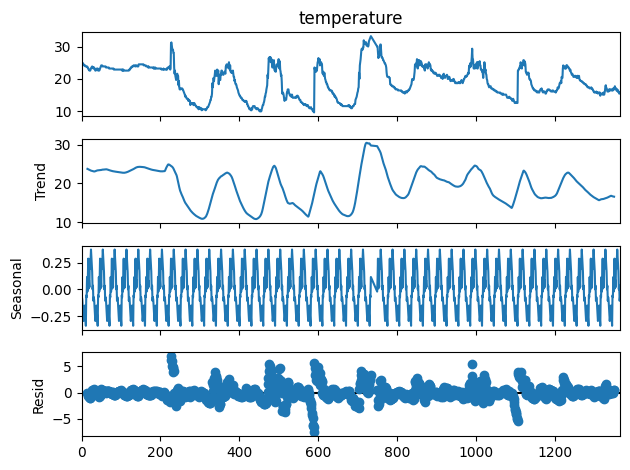

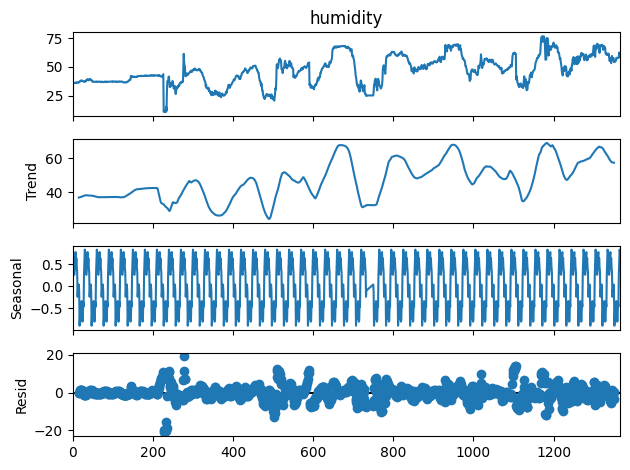

In [ ]:
decomposition_suhu = seasonal_decompose(df['temperature'], model='additive', period=30)
decomposition_suhu.plot()
plt.show()

# Lakukan dekomposisi data kelembaban
decomposition_kelembaban = seasonal_decompose(df['humidity'], model='additive', period=30)
decomposition_kelembaban.plot()
plt.show()

# Menganalisa korelasi antara suhu dan kelembaban

Untuk menganalisis hubungan antara suhu dan kelembaban, saya menggunakan metode pearson dan spearman.
Korelasi Pearson mengukur hubungan linear antara dua variabel.
Korelasi Spearman mengukur hubungan monotonik antara dua variabel.

In [ ]:
correlation_pearson = df[['temperature', 'humidity']].corr(method='pearson')
correlation_spearman = df[['temperature', 'humidity']].corr(method='spearman')

print("Korelasi Pearson:\n", correlation_pearson)
print("Korelasi Spearman:\n", correlation_spearman)

Korelasi Pearson:
              temperature  humidity
temperature      1.00000  -0.53348
humidity        -0.53348   1.00000
Korelasi Spearman:
              temperature  humidity
temperature     1.000000 -0.532212
humidity       -0.532212  1.000000


Dari analisis didapatkan:

Korelasi pearson : Korelasi antara suhu (temperature) dan kelembaban (humidity) = -0.53348
Ini menunjukkan bahwa terdapat korelasi negatif sedang antara suhu dan kelembaban. Artinya, ketika suhu meningkat, kelembaban cenderung menurun, dan sebaliknya. Korelasi ini tidak terlalu kuat (karena mendekati -0.5), tapi cukup signifikan untuk menunjukkan pola.

Korelasi spearman antara suhu dan kelembaban = -0.532212
Korelasi Spearman memberikan hasil yang sangat mirip dengan Pearson, yang menunjukkan bahwa hubungan antara suhu dan kelembaban mungkin tidak sepenuhnya linear, tetapi masih monotonik negatif. Ini berarti bahwa meskipun mungkin hubungan suhu dan kelembaban tidak selalu mengikuti garis lurus, secara umum, ketika suhu meningkat, kelembaban masih cenderung menurun.